In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

import seaborn as sns
from scipy.stats import norm, anderson

sns.set(color_codes=True)

df = pd.read_csv('/Users/danieletribuzio/Documents/Uni/Data_Mining/progetto_Carvana/training.csv')

Note: you may need to restart the kernel to use updated packages.


In [3]:
df.corr()[[
            'VehBCost', 
            'MMRAcquisitionAuctionAveragePrice',
            'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice',
            'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice',
            'MMRCurrentAuctionCleanPrice',
            'MMRCurrentRetailAveragePrice',
            'MMRCurrentRetailCleanPrice'
          ]]

,VehBCost,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
RefId,-0.011589,-0.010061,-0.014251,-0.030702,-0.032965,-0.006934,-0.011416,-0.020314,-0.023234
IsBadBuy,-0.098132,-0.105793,-0.099315,-0.084514,-0.080712,-0.106130,-0.101036,-0.100786,-0.097195
VehYear,0.349672,0.582416,0.533807,0.582414,0.540206,0.591968,0.549345,0.599415,0.559579
VehicleAge,-0.311903,-0.567106,-0.519897,-0.462299,-0.427526,-0.576914,-0.533646,-0.505322,-0.470640
WheelTypeID,-0.160986,-0.094658,-0.129608,-0.071736,-0.101796,-0.086798,-0.120046,-0.072684,-0.101250
VehOdo,-0.064436,-0.018381,0.023717,0.029107,0.061407,-0.030141,0.010755,0.013719,0.046070
MMRAcquisitionAuctionAveragePrice,0.789354,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424
MMRAcquisitionAuctionCleanPrice,0.781123,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604
MMRAcquisitionRetailAveragePrice,0.745718,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523
MMRAcquisitonRetailCleanPrice,0.744622,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231


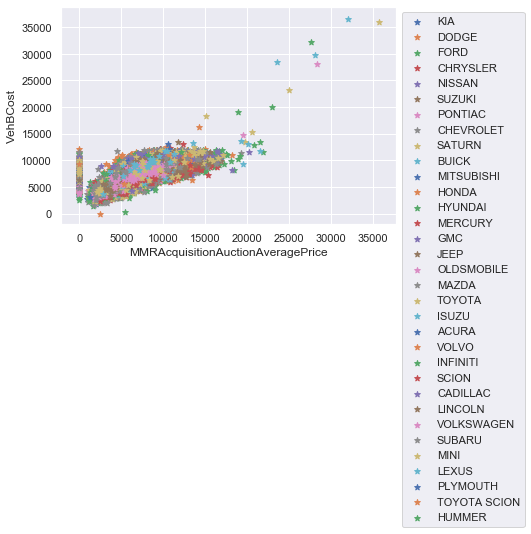

In [4]:
scatter = 'Make'
x = 'MMRAcquisitionAuctionAveragePrice'
y = 'VehBCost'

for name in df[scatter].unique():
    if str(name) != 'nan':
        plt.scatter(df[df[scatter] == name][x], 
                    df[df[scatter] == name][y], marker='*', label=name)

plt.xlabel(x)
plt.ylabel(y)
plt.legend(bbox_to_anchor=(0.4, 0, 1, 1))
plt.show()

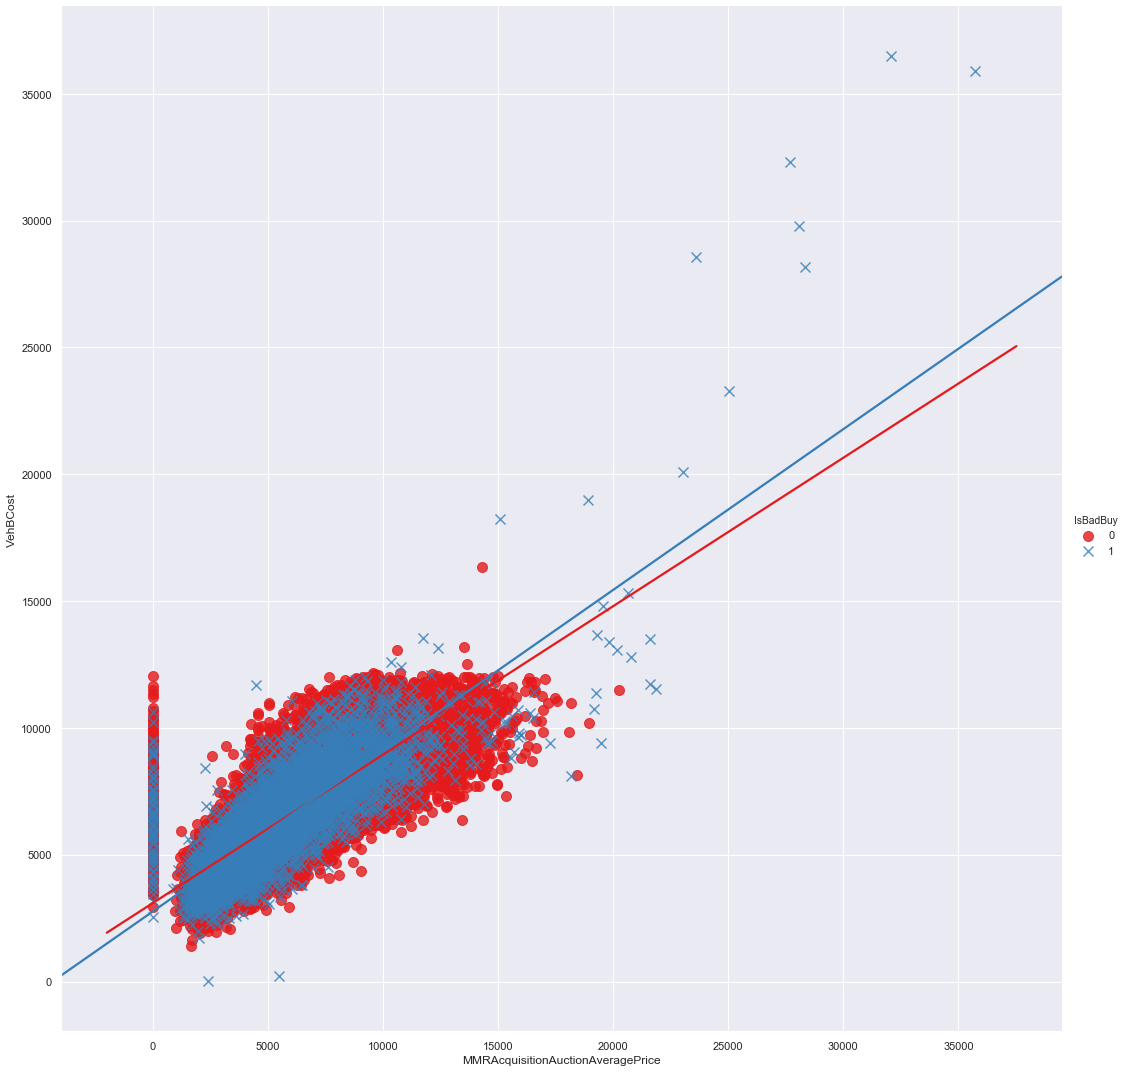

In [5]:
sns.lmplot(x="MMRAcquisitionAuctionAveragePrice", y="VehBCost", hue="IsBadBuy", data = df, markers=["o", "x"], palette="Set1",height=15, aspect=1, robust = True , ci=None, scatter_kws={"s": 100})

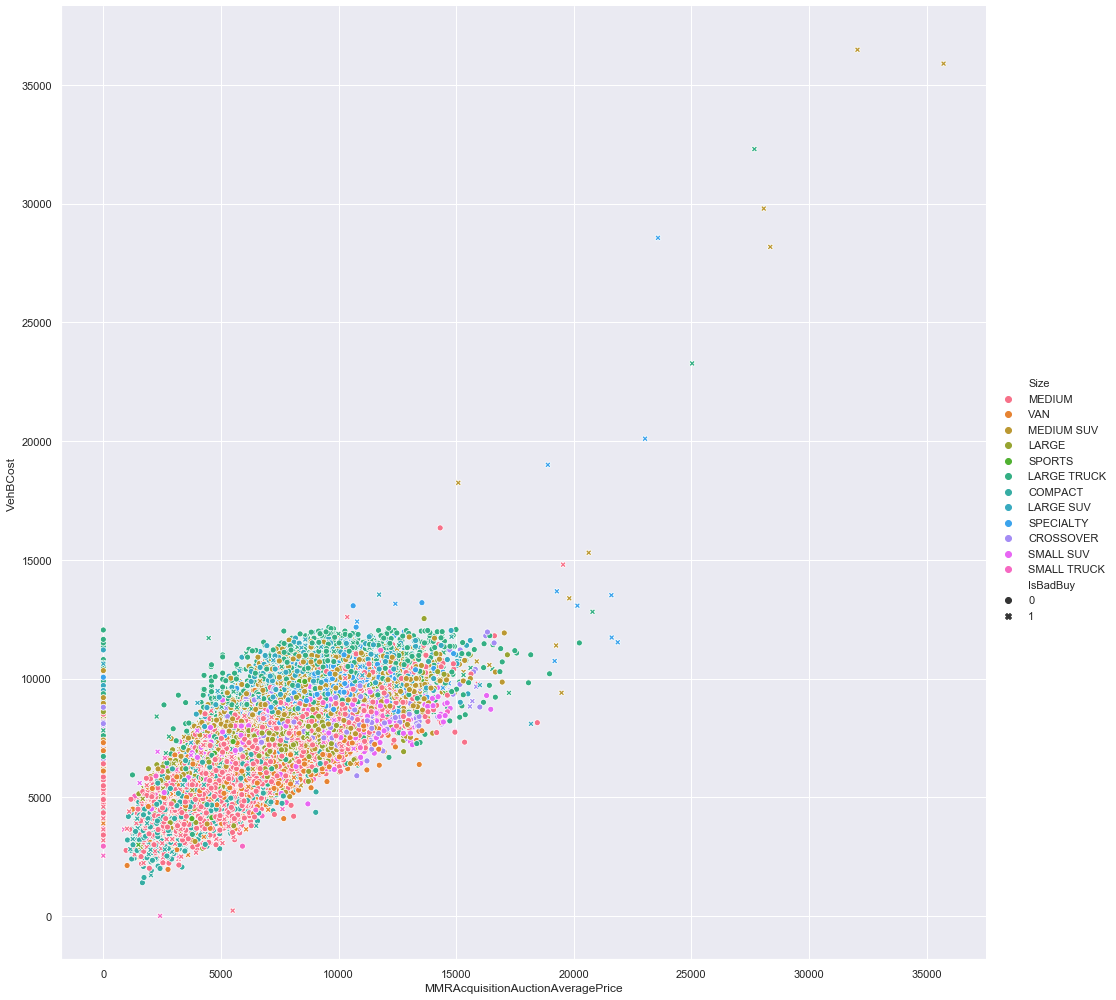

In [6]:
sns.relplot(x="MMRAcquisitionAuctionAveragePrice", y="VehBCost", hue="Size",style="IsBadBuy", data = df,height=14, aspect=1)

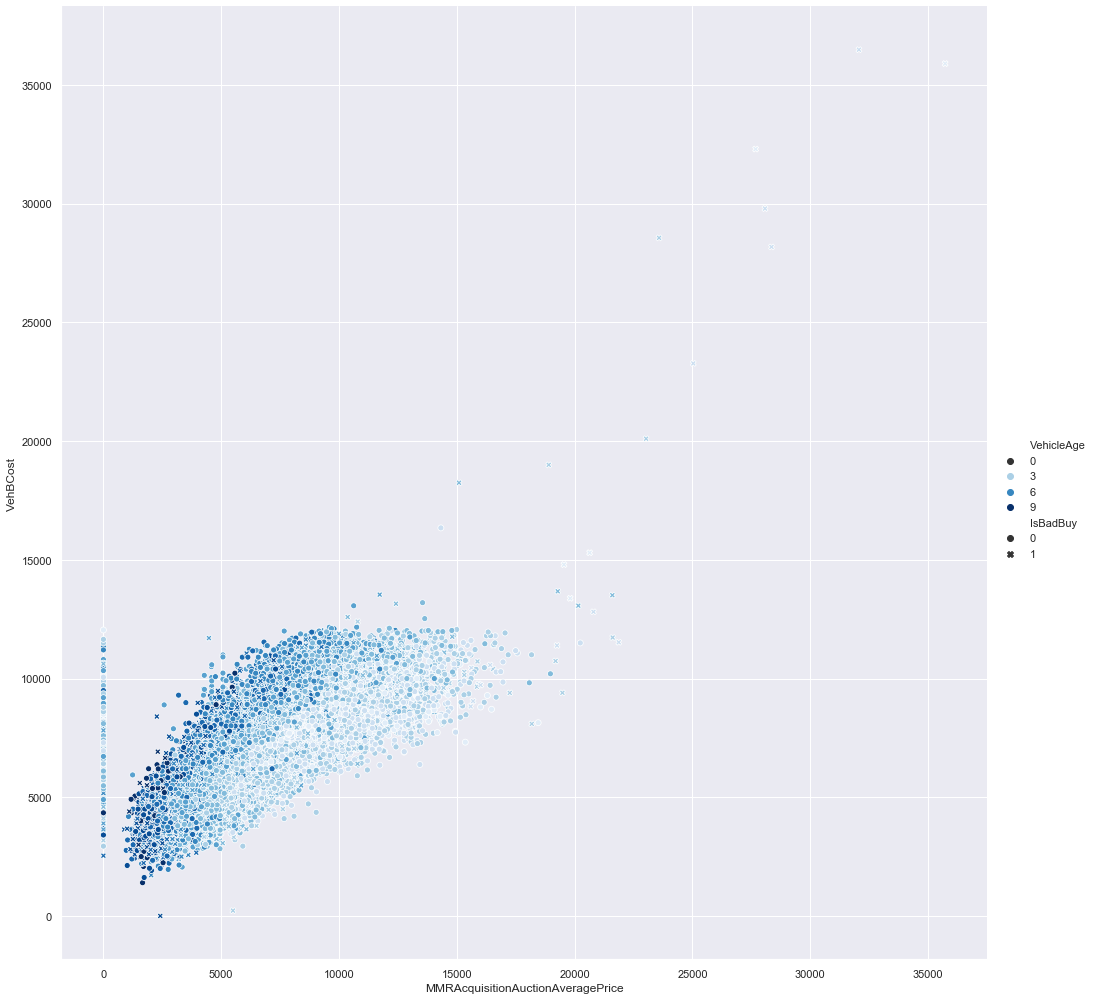

In [7]:
sns.relplot(x="MMRAcquisitionAuctionAveragePrice", y="VehBCost", hue="VehicleAge",style="IsBadBuy",  palette="Blues",data = df,height=14, aspect=1)

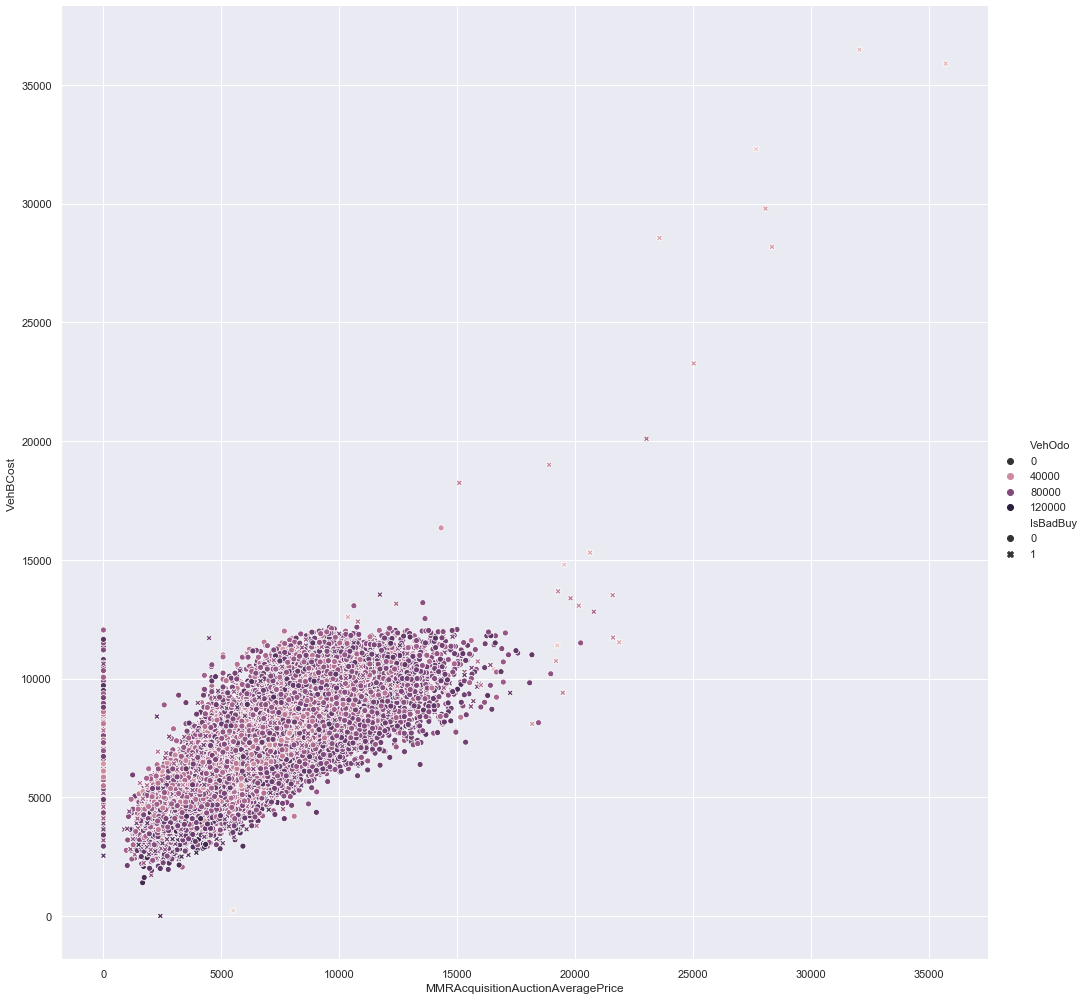

In [8]:
sns.relplot(x="MMRAcquisitionAuctionAveragePrice", y="VehBCost", hue="VehOdo", style="IsBadBuy", data = df,height=14, aspect=1)

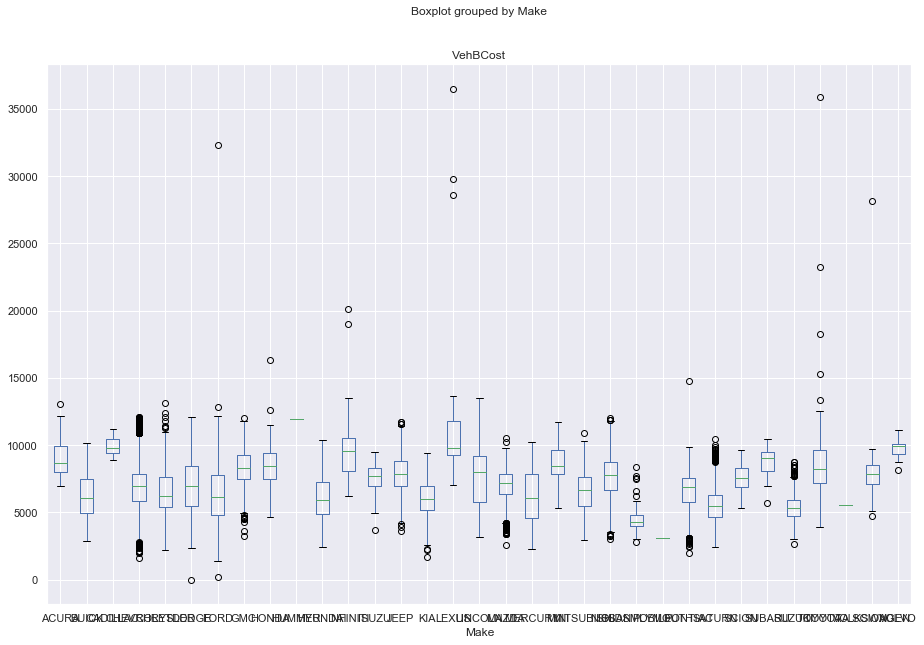

In [9]:
boxplot=df.boxplot(column='VehBCost', by='Make', figsize=(15,10))


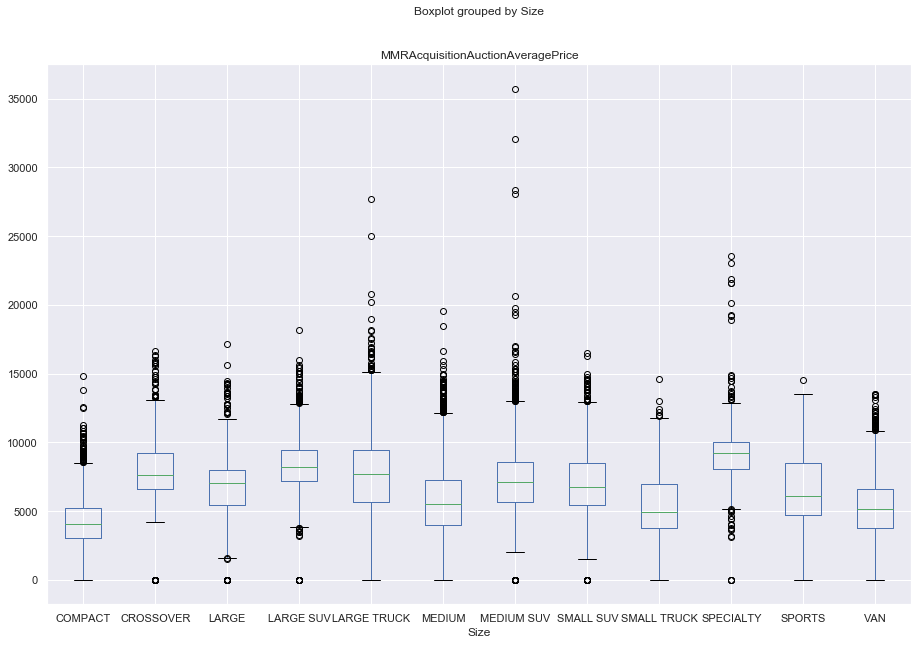

In [10]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], by='Size', figsize=(15,10))


In [11]:
potential_outliers=df[df['MMRAcquisitionAuctionAveragePrice'] > 15000][['Size', 'Make', 'Model', 'SubModel']]
potential_outliers['Size'].value_counts()

LARGE TRUCK    37
MEDIUM SUV     22
CROSSOVER      11
LARGE SUV      10
SPECIALTY       9
MEDIUM          6
LARGE           2
SMALL SUV       2
Name: Size, dtype: int64

In [12]:
filtered=df[df['Size'] == 'LARGE TRUCK']

# df['Size'] == 'LARGE TRUCK'

Text(0, 0.5, 'VehBCost')

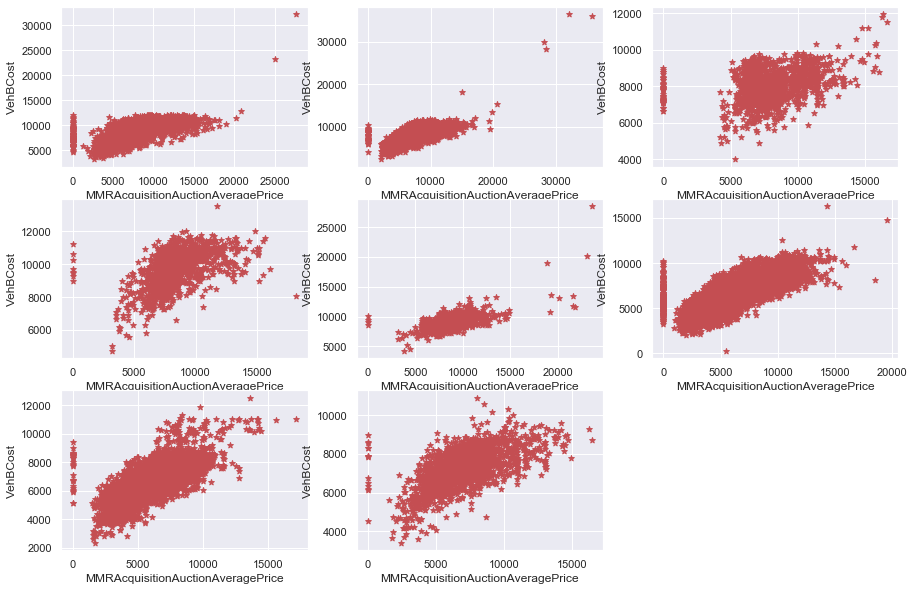

In [13]:
fig=plt.figure(figsize=(15,10))
fig_dims=(3,3)

plt.subplot2grid(fig_dims,(0,0))
plt.scatter(df[df['Size']=='LARGE TRUCK']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='LARGE TRUCK']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(0,1))
plt.scatter(df[df['Size']=='MEDIUM SUV']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='MEDIUM SUV']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
                 
plt.subplot2grid(fig_dims,(0,2))
plt.scatter(df[df['Size']=='CROSSOVER']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='CROSSOVER']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(1,0))
plt.scatter(df[df['Size']=='LARGE SUV']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='LARGE SUV']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(1,1))
plt.scatter(df[df['Size']=='SPECIALTY']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='SPECIALTY']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(1,2))
plt.scatter(df[df['Size']=='MEDIUM']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='MEDIUM']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(2,0))
plt.scatter(df[df['Size']=='LARGE']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='LARGE']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

plt.subplot2grid(fig_dims,(2,1))
plt.scatter(df[df['Size']=='SMALL SUV']['MMRAcquisitionAuctionAveragePrice'],df[df['Size']=='SMALL SUV']['VehBCost'],color='r',marker='*')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')

In [14]:
filtered_M=df[df['MMRAcquisitionAuctionAveragePrice']>17000]
m=pd.DataFrame(filtered_M[df['Size']=='MEDIUM'])
m

/Users/danieletribuzio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
5953,25461,0,5/5/2009,MANHEIM,2008,1,FORD,TAURUS,Lim,4D SEDAN LIMITED,...,20427.0,22341.0,NaN,NaN,17212,75050,TX,8140.00,0,1506
53207,35788,1,12/28/2009,MANHEIM,2008,1,PONTIAC,G8 V8,GT,4D SEDAN GT,...,24286.0,25060.0,NaN,NaN,16044,22403,VA,14796.57,0,1121


In [15]:
filtered_S=df[df['MMRAcquisitionAuctionAveragePrice']>17000]
s=pd.DataFrame(filtered_S[df['Size']=='SPECIALTY'])
s

/Users/danieletribuzio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
5691,6270,1,4/29/2010,MANHEIM,2006,4,LEXUS,GS300,NaN,4D SEDAN,...,23951.0,26754.0,NaN,NaN,18881,30272,GA,13070.02,0,764
5897,38052,1,11/20/2009,MANHEIM,2006,3,INFINITI,M35,Bas,4D SEDAN,...,20090.0,22120.0,NaN,NaN,22916,89165,NV,10738.65,0,762
6733,37073,1,6/16/2010,MANHEIM,2007,3,INFINITI,M35,Bas,4D SEDAN,...,27269.0,30194.0,NaN,NaN,19064,75236,TX,20100.00,0,1020
7380,53100,1,9/14/2010,OTHER,2007,3,INFINITI,G35,Bas,4D SEDAN,...,22417.0,24653.0,NaN,NaN,99761,85018,AZ,19000.00,0,764
11498,33502,1,5/12/2009,MANHEIM,2006,3,LEXUS,GS300 3.0L I6 EFI,NaN,4D SEDAN,...,23327.0,26164.0,YES,GREEN,21973,34761,FL,11727.64,0,764
23109,6038,1,11/23/2010,MANHEIM,2007,3,LEXUS,GS450H,NaN,4D SEDAN HYBRID,...,29752.0,33337.0,NaN,NaN,835,85040,AZ,28560.00,0,1121
24014,15340,1,6/23/2010,MANHEIM,2006,4,LEXUS,GS300,NaN,4D SEDAN,...,23107.0,26542.0,NaN,NaN,835,94544,CA,13674.57,0,764
36887,19145,1,2/2/2010,MANHEIM,2006,4,INFINITI,FX35 AWD,NaN,4D SPORT UTILITY,...,24223.0,27409.0,NaN,NaN,22916,80022,CO,13509.79,0,1187
54862,63915,1,8/19/2009,ADESA,2007,2,INFINITI,G35 3.5L V6 SMPI,Bas,4D SEDAN,...,22581.0,25342.0,YES,GREEN,835,85226,AZ,11527.00,0,702


In [16]:
filtered_M=df[df['MMRAcquisitionAuctionAveragePrice']>17000]
me=pd.DataFrame(filtered_M[df['Size']=='MEDIUM'])
me


/Users/danieletribuzio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
5953,25461,0,5/5/2009,MANHEIM,2008,1,FORD,TAURUS,Lim,4D SEDAN LIMITED,...,20427.0,22341.0,NaN,NaN,17212,75050,TX,8140.00,0,1506
53207,35788,1,12/28/2009,MANHEIM,2008,1,PONTIAC,G8 V8,GT,4D SEDAN GT,...,24286.0,25060.0,NaN,NaN,16044,22403,VA,14796.57,0,1121


In [17]:
filtered_L=df[df['MMRAcquisitionAuctionAveragePrice']>15000]
l=pd.DataFrame(filtered_L[df['Size']=='LARGE'])
l

/Users/danieletribuzio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
40094,52821,0,8/2/2010,OTHER,2007,3,NISSAN,MAXIMA,SE,4D SEDAN SE,...,19269.0,20674.0,NaN,NaN,52598,26431,WV,10990.0,0,1155
51026,11361,0,3/22/2010,MANHEIM,2007,3,TOYOTA,AVALON,XL,4D SEDAN LIMITED,...,20831.0,22655.0,NaN,NaN,18111,27542,NC,11000.0,0,569


In [18]:
filtered_SS = df[df['MMRAcquisitionAuctionAveragePrice']>15000]
ss=pd.DataFrame(filtered_SS[df['Size']=='SMALL SUV'])
ss

/Users/danieletribuzio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
37460,51869,0,8/18/2010,MANHEIM,2009,1,SUBARU,FORESTER AWD,X,4D SPORT UTILITY 2.5X,...,19378.0,21832.0,NaN,NaN,22916,80011,CO,9285.0,0,909
43157,32502,0,2/24/2009,MANHEIM,2008,1,MERCURY,MARINER 4WD V6,Bas,4D SUV 3.0L LUXURY,...,16017.0,17905.0,NaN,NaN,3453,80022,CO,8705.0,0,1503


In [19]:
frames=[lt,m,s,me,l,ss]
outliers=pd.concat(frames)


NameError: name 'lt' is not defined

In [ ]:
scatter = 'Size'
x = 'MMRAcquisitionAuctionAveragePrice'
y = 'VehBCost'

for name in outliers[scatter].unique():
    if str(name) != 'nan':
        plt.scatter(outliers[outliers[scatter] == name][x], 
                    outliers[outliers[scatter] == name][y], marker='*', label=name)

plt.xlabel(x)
plt.ylabel(y)
plt.legend(bbox_to_anchor=(0.4, 0, 1, 1))
plt.show()

In [ ]:
potential_outliers = df[df['VehBCost'] > 15000][['Size', 'Make', 'Model', 'SubModel', 'Trim']]
potential_outliers

In [ ]:
models = pd.DataFrame()

for i in range(len(potential_outliers)):
    models = pd.DataFrame.append(models, df[(df['Model'] == potential_outliers['Model'].values[i]) & (df['SubModel'] == potential_outliers['SubModel'].values[i])][[
         'RefId',
         'Make',
         'Model',
         'SubModel',
         'Trim',
         'Size',
         'VehBCost',
         'MMRAcquisitionAuctionAveragePrice'
    ]])
    
models

In [ ]:
var = 'Size'
data = pd.concat([df['VehBCost'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="VehBCost", data=data)
fig.axis(ymin=0, ymax=40000);
plt.xticks(rotation=90);

In [ ]:
import seaborn as sns

sns.set(style="white", color_codes=True)
sns.jointplot(x=df["MMRAcquisitionAuctionAveragePrice"], y=df["VehBCost"], kind='hex', color="skyblue")


In [ ]:

boxplot_VehYear = df.boxplot(column=['VehYear'], by='IsBadBuy' )
boxplot_MMRAAAP = df.boxplot(column=['VehicleAge'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['WheelTypeID'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['VehOdo'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['MMRAcquisitionAuctionCleanPrice'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'], by='IsBadBuy')
boxplot_VehYear = df.boxplot(column=['MMRCurrentAuctionAveragePrice'], by='IsBadBuy' )
boxplot_VehYear = df.boxplot(column=['MMRCurrentAuctionCleanPrice'], by='IsBadBuy' )
boxplot_MMRAAAP = df.boxplot(column=['MMRCurrentRetailAveragePrice'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['MMRCurrentRetailCleanPrice'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['BYRNO'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['VNZIP1'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['VehBCost'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['IsOnlineSale'], by='IsBadBuy')
boxplot_MMRAAAP = df.boxplot(column=['WarrantyCost'], by='IsBadBuy')

In [ ]:
pd.plotting.scatter_matrix(df[['VehBCost', 'IsBadBuy']], figsize =(20,10))
plt.show()

In [ ]:
df['Size'].unique()

In [ ]:
plt.scatter(df[df['IsBadBuy'] == 0]['Size']=='Medium', 
            df[df['IsBadBuy'] == 0]['VehBCost'], color='g', marker='*', label='BadBuy')
plt.scatter(df[df['IsBadBuy'] == 1]['Size'] == 'Medium', 
            df[df['IsBadBuy'] == 1]['VehBCost'], color='r',label='NotBadBuy')
plt.xlabel('MMRAcquisitionAuctionAveragePrice')
plt.ylabel('VehBCost')
plt.legend()
plt.show()

In [ ]:
from pyod.models.knn import KNN   # kNN detector
